
  ## Libraries Used

- **NumPy**: Package for numerical computing
- **Random**: Module for generating random numbers
- **Matplotlib.pyplot**: Plotting library for creating visualizations
- **Seaborn**: Statistical data visualization library


In [55]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Creating helper functions**


  - first function handles the mathematical representation of the density function $f(x) = 1/2\cdot\mathrm{e}^{-|x|}$


In [56]:
def probabilityDensityFunction(x):
    return 0.5*(np.exp(-np.abs(x)))

  - second and third functions check for conditions on N and S when passing them as arguments

In [57]:
def isPositiveInteger(number):
    return isinstance(number, int) and number > 0

In [58]:
def isPositiveReal(number):
    return isinstance(number, float) and number > 0

**Implementing Random Walk Metropolis Algorithm**

In [59]:
def RandomWalkMetropolis(N, S, pdf_function=probabilityDensityFunction):
    generatedSamples = []
    if isPositiveInteger(N) and isPositiveReal(S):
        generatedSamples.insert(0, random.random())
        for i in range(1,N):
            X_star = np.random.normal(loc=generatedSamples[i-1],scale=S)
            random_Number = np.random.uniform(0.0, 1.0)
            log_Ratio = np.log(pdf_function(X_star)) - np.log(pdf_function(generatedSamples[i-1]))
            generatedSamples.append(X_star) if np.log(random_Number) < log_Ratio else generatedSamples.append(generatedSamples[i-1])
        return  generatedSamples

    return None

**Testing the function to generate 10000 samples with a standard deviation 1.0**

In [74]:
test = RandomWalkMetropolis(10000,1.0)
print(type(test), len(test), test)

<class 'list'> 10000 [0.8962596825380922, 0.30049721728135814, 1.3999524437706587, 1.3999524437706587, 2.212398257796869, 1.6260196080519518, 1.2529091084720334, -0.008049387473373804, -0.008049387473373804, -0.008049387473373804, -0.008049387473373804, -0.706842095399567, -0.6543582109097146, -0.8821485532597737, -0.8821485532597737, 0.15729524398203276, 0.6478401892210139, 2.1268742883741343, 1.2203203188823641, 1.4730210739978702, -0.35857730087019535, -0.35857730087019535, -0.35857730087019535, -0.30779862081392906, -0.5198769620910106, -0.4357366588388851, -0.27441432359438916, 0.9124308088142963, 0.27466037108297514, 0.27466037108297514, -0.17256482494963465, -0.17256482494963465, 0.33655705047451545, 0.9128405845090393, -0.8324752643229578, -1.1830465379063018, -1.1830465379063018, -1.1830465379063018, -0.17639407548636754, -0.17639407548636754, -0.001883037913241875, -0.43952215188944255, -0.7063611373184377, -0.23263520564091728, -0.5826384842865128, -0.16323611796627435, 1.13

**Plotting the histogram for the genrated samples**

<Axes: ylabel='Count'>

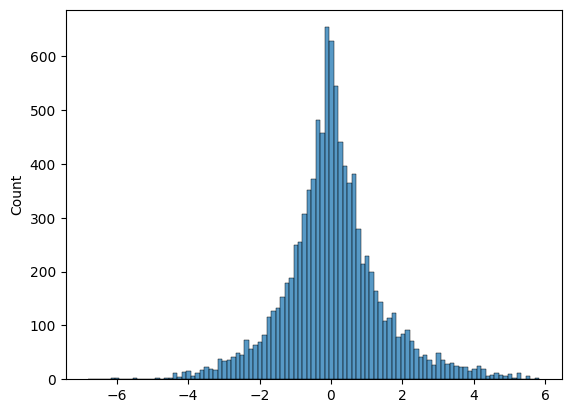

In [61]:
sns.histplot(test)

**Plotting the kernel density plot**

<Axes: ylabel='Density'>

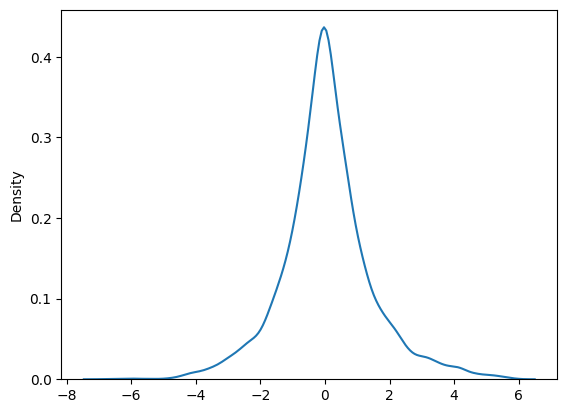

In [62]:
sns.kdeplot(test)

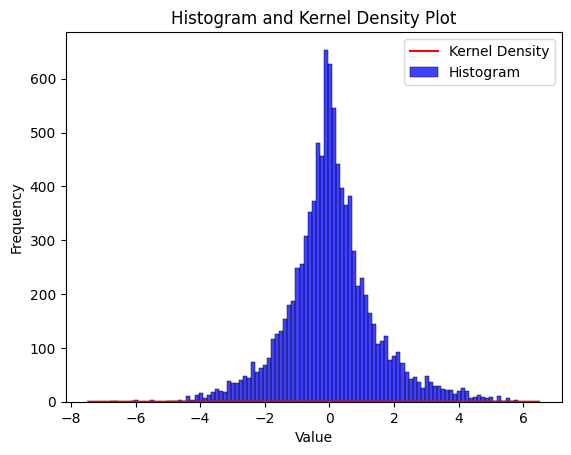

In [63]:
fig, ax = plt.subplots()
sns.histplot(test, ax=ax, kde=False, color='blue', label='Histogram')
sns.kdeplot(test, color='red', label='Kernel Density')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Histogram and Kernel Density Plot')
ax.legend()
plt.show()

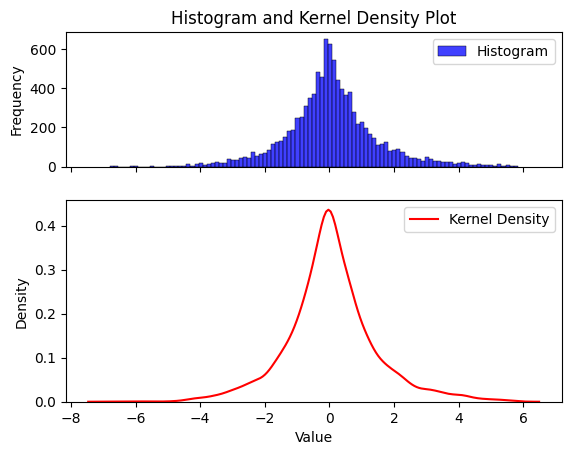

Sample mean =  0.05690209172079433
Standard deviation =  1.398831187076905


In [64]:
sample_mean = np.mean(test)
sample_std = np.std(test)

normalized_test =[]
normalized_test = [normalized_test.append(element/max(test) for element in test)]

fig, (ax_hist, ax_kde) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (0.4, 0.6)})
sns.histplot(test, ax=ax_hist, kde=False, color='blue', label='Histogram')
sns.kdeplot(test, ax=ax_kde, color='red', label='Kernel Density')
ax_kde.set_ylim(0, max(normalized_test))

ax_hist.set_ylabel('Frequency')
ax_kde.set_xlabel('Value')
ax_kde.set_ylabel('Density')
ax_hist.set_title('Histogram and Kernel Density Plot')

ax_hist.legend()
ax_kde.legend()

plt.setp(ax_hist.get_xticklabels(), visible=False)
plt.show()

print('Sample mean = ', sample_mean)
print('Standard deviation = ', sample_std)

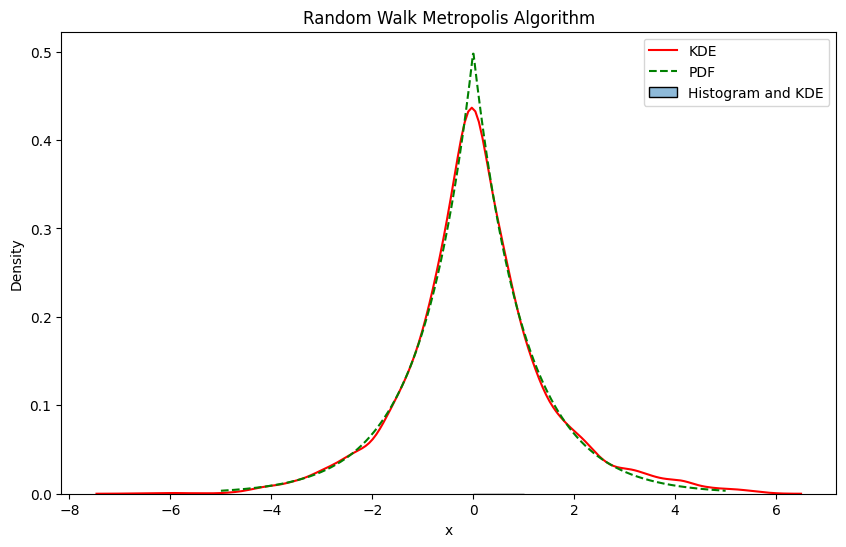

Sample mean =  0.05690209172079433
Standard deviation =  1.398831187076905


In [65]:
sample_mean = np.mean(test)
sample_std = np.std(test)

normalized_test =[]
normalized_test = [normalized_test.append(element/max(test)) for element in test]

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(normalized_test, bins=50, kde=True, label='Histogram and KDE', ax=ax)
sns.kdeplot(test, label='KDE', color='red', ax=ax)

x_values = np.linspace(-5, 5, 1000)
plt.plot(x_values, probabilityDensityFunction(x_values), label='PDF', linestyle='--', color='green')

plt.legend()

plt.title('Random Walk Metropolis Algorithm')
plt.xlabel('x')
plt.ylabel('Density')
plt.show()

print('Sample mean = ', sample_mean)
print('Standard deviation = ', sample_std)

**Creating a function to generate multiple sequences of Random Walk Metropolis and storing them in a numpy array**

In [66]:
def generateChains(num_chains, N, S):
  # num_chains : number of sequences of generated values
  # N : length of a sequence
  # S : standard deviation
  chains = []
  for _ in range(num_chains):
    chain = RandomWalkMetropolis(N, S)
    if chain is not None:
      chains.append(chain)
  return np.array(chains)

**Creating a function that calculates the R_hat Value**

The R_hat value tests the convergence of the algorithm

R_hat values close to 1 indicate convergence

In [67]:
def calculate_R_hat(chains):

  M_j = np.mean(chains, axis=1)

  M = np.mean(M_j)

  V_j = np.mean((chains - M_j[:, np.newaxis]) ** 2, axis=1)

  W = np.mean(V_j)

  B = np.mean((M_j - M) ** 2)

  R_hat = np.sqrt((B + W) / W)

  return R_hat

**Testing the implementations**

  - First step, we generate J sequences of RWM


In [76]:
test2 = generateChains(2,3,1.0)
print(test2, type(test2))

[[ 0.62968612 -1.04724603 -1.04724603]
 [ 0.48548113  0.5354759   0.04449328]] <class 'numpy.ndarray'>


  - Second step, we calculate the convergence of the algorithm using the R_hat value

In [75]:
score = calculate_R_hat(test2)
print(score, type(score))

1.2886683167564459 <class 'numpy.float64'>


**Calculating the R_hat value for RWM Algorithm with N = 2000, s = 0.001 and J(num_chains) = 4**

In [79]:
final_test = generateChains(4, 2000, 0.001)
print(final_test, type(final_test))

[[0.96396012 0.96381887 0.96479862 ... 1.0057771  1.00645019 1.0056848 ]
 [0.96206288 0.9630907  0.96034608 ... 0.98201944 0.98234121 0.98349333]
 [0.95612765 0.95463504 0.95321391 ... 0.90126688 0.90103945 0.90205942]
 [0.80162383 0.80426816 0.80379695 ... 0.8260405  0.82738567 0.8267251 ]] <class 'numpy.ndarray'>


In [80]:
final_score = calculate_R_hat(final_test)
print(final_score, type(final_score))

4.174339092379579 <class 'numpy.float64'>


**Keeping N and J fixed, calculating and plotting R values over a grid of s values in the interval between 0.001 and 1.0**

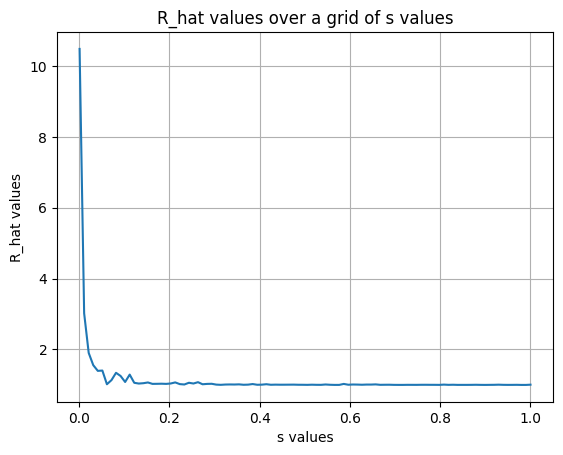

In [72]:
N = 2000
J = 4
s_values = np.linspace(0.001, 1, 100)
R_hat_values = []

for s in s_values:
  chains = generateChains(J, N, s)
  R_hat_value = calculate_R_hat(chains)
  R_hat_values.append(R_hat_value)


plt.plot(s_values, R_hat_values)
plt.xlabel('s values')
plt.ylabel('R_hat values')
plt.title('R_hat values over a grid of s values')
plt.grid(True)
plt.show()